In [76]:
import numpy as np

# O(n^2)
def selection_sort(x):
    for u in range(len(x)):
        swap_idx = u + np.argmin(x[u:])
        (x[u], x[swap_idx]) = (x[swap_idx], x[u])
    return x

def selection_sort_copy(x):
    y = x.copy()
    return selection_sort(y)

In [77]:
x = np.array([1,6,4,7,9,5,7,3,2,0])
print(x, ' =>', selection_sort_copy(x))
print(x, ' =>', selection_sort(x))

[1 6 4 7 9 5 7 3 2 0]  => [0 1 2 3 4 5 6 7 7 9]
[0 1 2 3 4 5 6 7 7 9]  => [0 1 2 3 4 5 6 7 7 9]


In [78]:
# compare element-to-element: 
#           [first-to-secondlast] > [second-to-last] 

# when all comparisons are false
#           x_i < x_i+1 for all i's

# hence the array is sorted

def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
        print(x[:-1])
        print(x[1:])
        print((x[:-1] > x[1:]))
        print()
    return x

In [79]:
x = np.array([1,6,4,9,7,])
print(x, ' =>', bogosort(x))

[7 4 1 9]
[4 1 9 6]
[ True  True False  True]

[6 1 7 4]
[1 7 4 9]
[ True False  True False]

[7 6 9 1]
[6 9 1 4]
[ True False  True False]

[7 6 9 4]
[6 9 4 1]
[ True False  True  True]

[7 9 4 6]
[9 4 6 1]
[False  True False  True]

[9 7 4 6]
[7 4 6 1]
[ True  True False  True]

[4 6 9 1]
[6 9 1 7]
[False False  True False]

[9 4 1 6]
[4 1 6 7]
[ True  True False False]

[7 1 4 6]
[1 4 6 9]
[ True False False False]

[7 9 4 1]
[9 4 1 6]
[False  True  True False]

[1 6 9 7]
[6 9 7 4]
[False False  True  True]

[6 1 7 4]
[1 7 4 9]
[ True False  True False]

[9 6 7 1]
[6 7 1 4]
[ True False  True False]

[4 9 6 7]
[9 6 7 1]
[False  True False  True]

[6 4 7 1]
[4 7 1 9]
[ True False  True False]

[6 7 4 1]
[7 4 1 9]
[False  True  True False]

[9 7 4 1]
[7 4 1 6]
[ True  True  True False]

[7 9 4 1]
[9 4 1 6]
[False  True  True False]

[6 4 7 1]
[4 7 1 9]
[ True False  True False]

[4 1 6 9]
[1 6 9 7]
[ True False False  True]

[4 9 1 7]
[9 1 7 6]
[False  True False  True]

[6 7 4 1]
[7 

## Fast Sorting in NumPy: np.sort and np.argsort

Although Python has built-in sort and sorted functions to work with lists, we won't discuss them here because NumPy's np.sort function turns out to be much more efficient and useful for our purposes. By default np.sort uses an [NlogN], quicksort algorithm, though mergesort and heapsort are also available. For most applications, the default quicksort is more than sufficient.

In [80]:
x = np.array([2,1,4,3,5])
print(x,' => ',np.sort(x),'which modified x:',x,'(i.e. worked in-place)')

[2 1 4 3 5]  =>  [1 2 3 4 5] which modified x: [2 1 4 3 5] (i.e. worked in-place)


In [81]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)
print(x[i])
print(x)
print(np.sort(x))
print(x)
print(x.sort())
print(x)

[1 0 3 2 4]
[1 2 3 4 5]
[2 1 4 3 5]
[1 2 3 4 5]
[2 1 4 3 5]
None
[1 2 3 4 5]


## Sorting along rows or columns¶
A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the axis argument. For example:

In [82]:
generator = np.random.RandomState(42)
X = generator.randint(0,10,(4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [83]:
print(np.sort(X,axis=0), '\n\n',np.sort(X,axis=1)\
      ,'\n\n reverse ordering:\n',-np.sort(-X,axis=1) \
      , '\n\n original unchanged:\n',X)

[[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]] 

 [[3 4 6 6 7 9]
 [2 3 4 6 7 7]
 [1 2 4 5 7 7]
 [0 1 4 5 5 9]] 

 reverse ordering:
 [[9 7 6 6 4 3]
 [7 7 6 4 3 2]
 [7 7 5 4 2 1]
 [9 5 5 4 1 0]] 

 original unchanged:
 [[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

In [84]:
print(X.sort(axis=0),'\n\n original affected:\n',X)

None 

 original affected:
 [[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]


# Partial Sorts: Partitioning
Sometimes we're not interested in sorting the entire array, but simply want to find the k smallest values in the array. NumPy provides this in the np.partition function. np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [85]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order.

In [86]:
print('originally X: \n',X,'\n\n partioned: \n',np.partition(X,2,axis=0) )

originally X: 
 [[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]] 

 partioned: 
 [[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]


# Example: k-Nearest Neighbors
Let's quickly see how we might use this argsort function along multiple axes to find the nearest neighbors of each point in a set. We'll start by creating a random set of 10 points on a two-dimensional plane. Using the standard convention, we'll arrange these in a 10×2 array:

In [87]:
# rand generates numbers in [0,1]
# at variance wiht  randint, which accepts min-max and than a tuple for size
X = generator.rand(10,2)
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

In [88]:
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

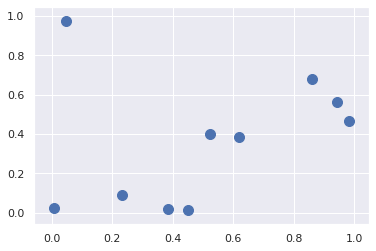

In [89]:
size=100
plt.scatter(X[:,0],X[:,1],s=size)

In [90]:
# exploring what adding 3rd dimension does
# in the three different possibilities
print(X,'\n\n',X[np.newaxis, :, :],'\n\n',X[:, np.newaxis, :],'\n\n',X[np.newaxis, :, :])

[[0.00706631 0.02306243]
 [0.52477466 0.39986097]
 [0.04666566 0.97375552]
 [0.23277134 0.09060643]
 [0.61838601 0.38246199]
 [0.98323089 0.46676289]
 [0.85994041 0.68030754]
 [0.45049925 0.01326496]
 [0.94220176 0.56328822]
 [0.3854165  0.01596625]] 

 [[[0.00706631 0.02306243]
  [0.52477466 0.39986097]
  [0.04666566 0.97375552]
  [0.23277134 0.09060643]
  [0.61838601 0.38246199]
  [0.98323089 0.46676289]
  [0.85994041 0.68030754]
  [0.45049925 0.01326496]
  [0.94220176 0.56328822]
  [0.3854165  0.01596625]]] 

 [[[0.00706631 0.02306243]]

 [[0.52477466 0.39986097]]

 [[0.04666566 0.97375552]]

 [[0.23277134 0.09060643]]

 [[0.61838601 0.38246199]]

 [[0.98323089 0.46676289]]

 [[0.85994041 0.68030754]]

 [[0.45049925 0.01326496]]

 [[0.94220176 0.56328822]]

 [[0.3854165  0.01596625]]] 

 [[[0.00706631 0.02306243]
  [0.52477466 0.39986097]
  [0.04666566 0.97375552]
  [0.23277134 0.09060643]
  [0.61838601 0.38246199]
  [0.98323089 0.46676289]
  [0.85994041 0.68030754]
  [0.45049925 0.

In [91]:
# here broadcasting happens
# print(X,'\n\n',X[np.newaxis, :, :],'\n\n',X[:, np.newaxis, :],'\n\n',X[np.newaxis, :, :])
print(X,'\n\n',X[np.newaxis, :, :]-X[:, np.newaxis, :])

[[0.00706631 0.02306243]
 [0.52477466 0.39986097]
 [0.04666566 0.97375552]
 [0.23277134 0.09060643]
 [0.61838601 0.38246199]
 [0.98323089 0.46676289]
 [0.85994041 0.68030754]
 [0.45049925 0.01326496]
 [0.94220176 0.56328822]
 [0.3854165  0.01596625]] 

 [[[ 0.          0.        ]
  [ 0.51770836  0.37679855]
  [ 0.03959936  0.95069309]
  [ 0.22570504  0.06754401]
  [ 0.6113197   0.35939957]
  [ 0.97616458  0.44370047]
  [ 0.8528741   0.65724511]
  [ 0.44343295 -0.00979746]
  [ 0.93513545  0.54022579]
  [ 0.3783502  -0.00709617]]

 [[-0.51770836 -0.37679855]
  [ 0.          0.        ]
  [-0.478109    0.57389455]
  [-0.29200332 -0.30925454]
  [ 0.09361135 -0.01739898]
  [ 0.45845623  0.06690192]
  [ 0.33516575  0.28044657]
  [-0.07427541 -0.38659601]
  [ 0.4174271   0.16342725]
  [-0.13935816 -0.38389472]]

 [[-0.03959936 -0.95069309]
  [ 0.478109   -0.57389455]
  [ 0.          0.        ]
  [ 0.18610568 -0.88314908]
  [ 0.57172035 -0.59129353]
  [ 0.93656522 -0.50699263]
  [ 0.81327474

In [92]:
urk = X[np.newaxis, :, :]-X[:, np.newaxis, :]
print(X,'\n\n',urk.shape,'\n\n', urk )

[[0.00706631 0.02306243]
 [0.52477466 0.39986097]
 [0.04666566 0.97375552]
 [0.23277134 0.09060643]
 [0.61838601 0.38246199]
 [0.98323089 0.46676289]
 [0.85994041 0.68030754]
 [0.45049925 0.01326496]
 [0.94220176 0.56328822]
 [0.3854165  0.01596625]] 

 (10, 10, 2) 

 [[[ 0.          0.        ]
  [ 0.51770836  0.37679855]
  [ 0.03959936  0.95069309]
  [ 0.22570504  0.06754401]
  [ 0.6113197   0.35939957]
  [ 0.97616458  0.44370047]
  [ 0.8528741   0.65724511]
  [ 0.44343295 -0.00979746]
  [ 0.93513545  0.54022579]
  [ 0.3783502  -0.00709617]]

 [[-0.51770836 -0.37679855]
  [ 0.          0.        ]
  [-0.478109    0.57389455]
  [-0.29200332 -0.30925454]
  [ 0.09361135 -0.01739898]
  [ 0.45845623  0.06690192]
  [ 0.33516575  0.28044657]
  [-0.07427541 -0.38659601]
  [ 0.4174271   0.16342725]
  [-0.13935816 -0.38389472]]

 [[-0.03959936 -0.95069309]
  [ 0.478109   -0.57389455]
  [ 0.          0.        ]
  [ 0.18610568 -0.88314908]
  [ 0.57172035 -0.59129353]
  [ 0.93656522 -0.50699263]

In [93]:
# power of 2 is applied to every element of 3-d matrix!
urk = (X[np.newaxis, :, :]-X[:, np.newaxis, :])**2
print(X,'\n\n',urk.shape,'\n\n', urk )

[[0.00706631 0.02306243]
 [0.52477466 0.39986097]
 [0.04666566 0.97375552]
 [0.23277134 0.09060643]
 [0.61838601 0.38246199]
 [0.98323089 0.46676289]
 [0.85994041 0.68030754]
 [0.45049925 0.01326496]
 [0.94220176 0.56328822]
 [0.3854165  0.01596625]] 

 (10, 10, 2) 

 [[[0.00000000e+00 0.00000000e+00]
  [2.68021941e-01 1.41977145e-01]
  [1.56810915e-03 9.03817359e-01]
  [5.09427629e-02 4.56219322e-03]
  [3.73711781e-01 1.29168048e-01]
  [9.52897288e-01 1.96870105e-01]
  [7.27394233e-01 4.31971139e-01]
  [1.96632778e-01 9.59902985e-05]
  [8.74478311e-01 2.91843907e-01]
  [1.43148872e-01 5.03556687e-05]]

 [[2.68021941e-01 1.41977145e-01]
  [0.00000000e+00 0.00000000e+00]
  [2.28588213e-01 3.29354951e-01]
  [8.52659388e-02 9.56383688e-02]
  [8.76308468e-03 3.02724521e-04]
  [2.10182111e-01 4.47586710e-03]
  [1.12336078e-01 7.86502769e-02]
  [5.51683628e-03 1.49456475e-01]
  [1.74245380e-01 2.67084648e-02]
  [1.94206961e-02 1.47375156e-01]]

 [[1.56810915e-03 9.03817359e-01]
  [2.28588213

In [94]:
# sum the 2 squared values within each pair
# which brings dimensions back down to (10,10)
# note I am summing over axis 2; axis -1 would do the same
urk = np.sum((X[np.newaxis, :, :]-X[:, np.newaxis, :])**2,axis=2)
print(X,'\n\n',urk.shape,'\n\n', urk )

[[0.00706631 0.02306243]
 [0.52477466 0.39986097]
 [0.04666566 0.97375552]
 [0.23277134 0.09060643]
 [0.61838601 0.38246199]
 [0.98323089 0.46676289]
 [0.85994041 0.68030754]
 [0.45049925 0.01326496]
 [0.94220176 0.56328822]
 [0.3854165  0.01596625]] 

 (10, 10) 

 [[0.         0.40999909 0.90538547 0.05550496 0.50287983 1.14976739
  1.15936537 0.19672877 1.16632222 0.14319923]
 [0.40999909 0.         0.55794316 0.18090431 0.00906581 0.21465798
  0.19098635 0.15497331 0.20095384 0.16679585]
 [0.90538547 0.55794316 0.         0.81458763 0.67649219 1.13419594
  0.74752753 1.08562368 0.9704683  1.03211241]
 [0.05550496 0.18090431 0.81458763 0.         0.23387834 0.70468321
  0.74108843 0.05338715 0.72671958 0.0288717 ]
 [0.50287983 0.00906581 0.67649219 0.23387834 0.         0.14021843
  0.1470605  0.16449241 0.13755476 0.18859392]
 [1.14976739 0.21465798 1.13419594 0.70468321 0.14021843 0.
  0.06080186 0.48946337 0.01100053 0.56059965]
 [1.15936537 0.19098635 0.74752753 0.74108843 0.1470

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [95]:
urk.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out! With the pairwise square-distances converted, we can now use np.argsort to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [96]:
# np.sort(urk,axis=1)

In [97]:
nearest = np.argsort(urk,axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]])

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest k neighbors, all we need is to partition each row so that the smallest k+1 squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the np.argpartition function:

In [99]:
K = 2
nearest_partition = np.argpartition(urk, K + 1, axis=1)

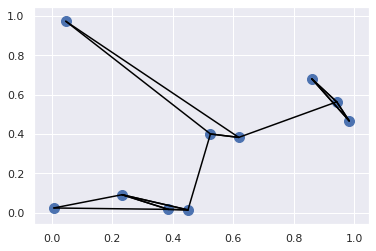

In [100]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

Each point in the plot has lines drawn to its two nearest neighbors. At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python. You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.